<a href="https://colab.research.google.com/github/Rodolphenkerbu/Abalone/blob/main/Nkerbu_RN_A6_DDS8555_A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#===============================================================================
# Importing Necessary Libraries for Data Processing and Model Building
#===============================================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


# Set seed for reproducibility
student_id = '4741644011'
first_three = int(student_id[:3])
last_three = int(student_id[-3:])
Randomizer = first_three + last_three
np.random.seed(Randomizer)
print(f"Randomizer seed: {Randomizer}")


Randomizer seed: 485


First few rows of the dataset:
   id  Gender        Age    Height      Weight  \
0   0    Male  24.443011  1.699998   81.669950   
1   1  Female  18.000000  1.560000   57.000000   
2   2  Female  18.000000  1.711460   50.165754   
3   3  Female  20.952737  1.710730  131.274851   
4   4    Male  31.641081  1.914186   93.798055   

   family_history_with_overweight  FAVC      FCVC       NCP        CAEC  \
0                               1     1  2.000000  2.983297   Sometimes   
1                               1     1  2.000000  3.000000  Frequently   
2                               1     1  1.880534  1.411685   Sometimes   
3                               1     1  3.000000  3.000000   Sometimes   
4                               1     1  2.679664  1.971472   Sometimes   

   SMOKE      CH2O  SCC       FAF       TUE       CALC                 MTRANS  \
0      0  2.763573    0  0.000000  0.976473  Sometimes  Public_Transportation   
1      0  2.000000    0  1.000000  1.000000          0 

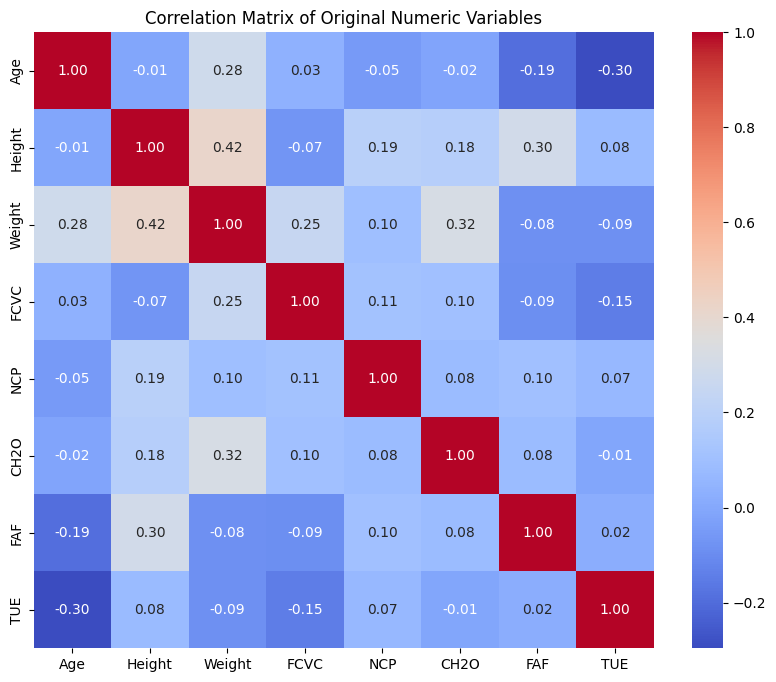


Correlation Matrix:
The correlation matrix reveals the relationships between numeric variables.
Height and weight show a strong positive correlation (0.52), indicating that
taller individuals generally weigh more. Age and weight also have a positive
correlation (0.28), suggesting older participants tend to weigh more. FAF
(frequency of physical activity) and CH2O (water consumption) display a moderate
positive correlation (0.18), meaning individuals who exercise more tend to drink
more water. Overall, most variables show weak correlations, indicating limited
linear relationships.


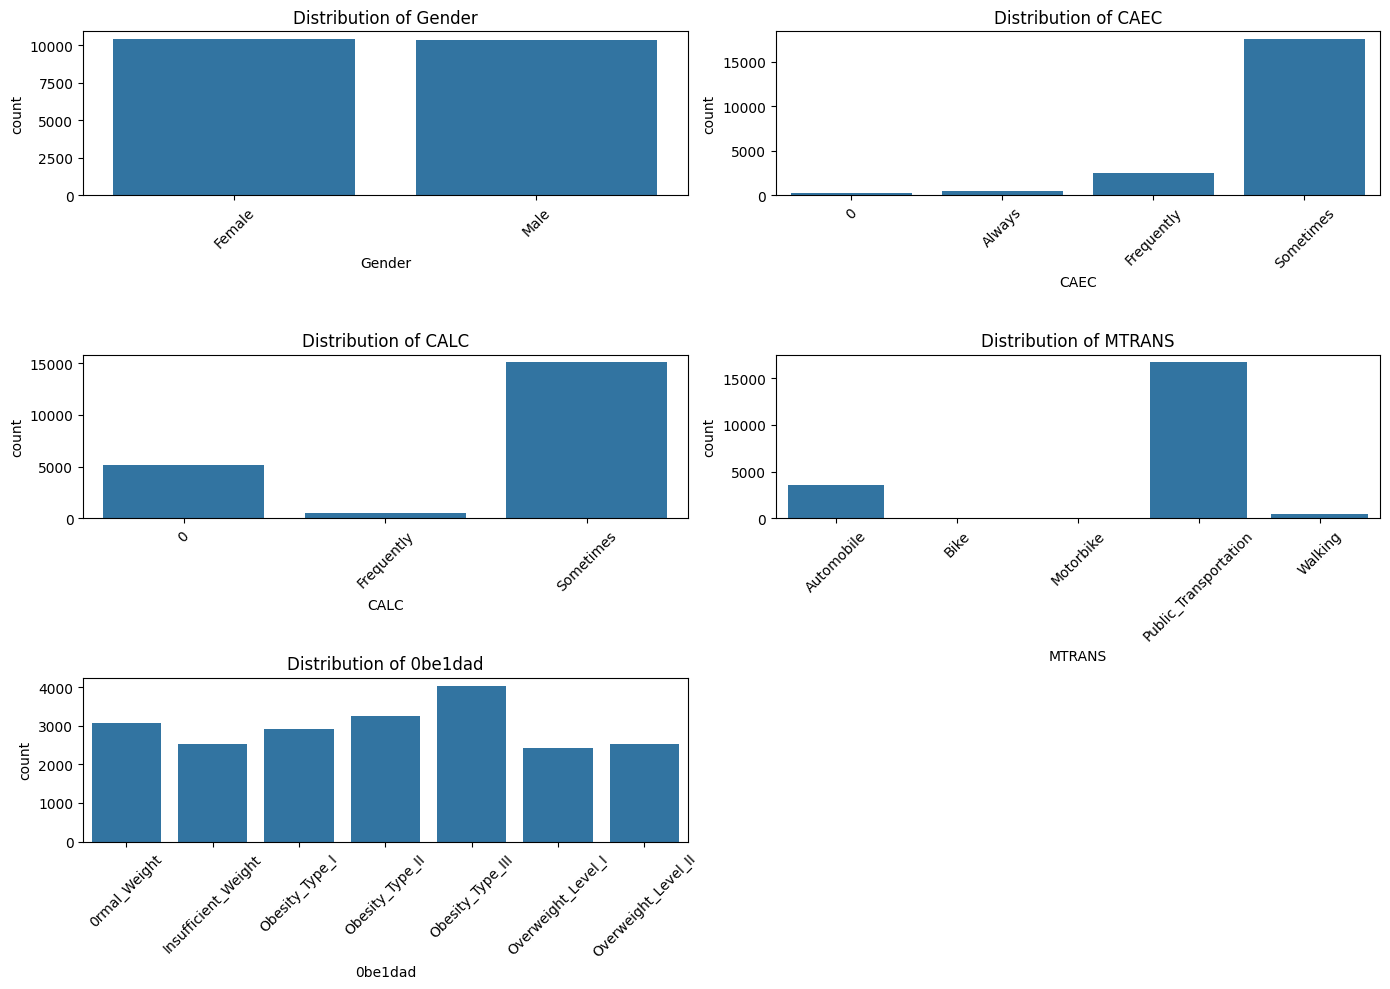


Distribution of CAEC (Consumption of Alcoholic Beverages):
The CAEC distribution highlights that the "Sometimes" category has the highest
count, indicating that most participants consume alcoholic beverages
occasionally. Other categories like "Frequently" and "Always" have lower counts,
showing less frequent consumption.

Distribution of CALC (Consumption of Alcohol):
The CALC distribution shows that "Sometimes" is the most common category,
followed by "0" (indicating no consumption) and "Frequently." This suggests that
occasional alcohol consumption is prevalent among participants.

Distribution of MTRANS (Mode of Transportation):
The MTRANS distribution reveals that "Public_Transportation" and "Automobile"
are the most common modes of transportation among participants. Other modes like
"Walking," "Bike," and "Motorbike" have lower counts, indicating less frequent
use.

Distribution of 0be1dad (Weight Category):
The weight category distribution shows that "Obesity_Type_III" has the h

In [2]:


# =============================================================================
# Step 1: Load the Dataset and Inspect Its Structure
# =============================================================================
data = pd.read_csv('/content/sample_data/obesity_level.csv')

print("First few rows of the dataset:")
print(data.head())

print("\nData Structure Information:")
print(data.info())

# Reclassify data types for categorical columns
data['Gender'] = data['Gender'].astype('category')
data['CAEC'] = data['CAEC'].astype('category')
data['CALC'] = data['CALC'].astype('category')
data['MTRANS'] = data['MTRANS'].astype('category')
data['0be1dad'] = data['0be1dad'].astype('category')

print("\nUpdated Data Types:")
print(data.dtypes)

# =============================================================================
# Step 2: Compute and Display Descriptive Statistics for Numeric Variables
# =============================================================================
# Define the list of original numeric variables
numeric_columns_orig = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Function to calculate comprehensive descriptive statistics
def calculate_descriptive_stats(df, columns):
    stats_df = pd.DataFrame()
    stats_df['Mean'] = df[columns].mean()
    stats_df['Median'] = df[columns].median()
    stats_df['Mode'] = df[columns].mode().iloc[0]
    stats_df['St. Deviation'] = df[columns].std()
    stats_df['Range'] = df[columns].max() - df[columns].min()
    stats_df['IQR'] = df[columns].quantile(0.75) - df[columns].quantile(0.25)
    stats_df['Skewness'] = df[columns].skew()
    stats_df['Kurtosis'] = df[columns].kurtosis()
    return stats_df

# Calculate the descriptive statistics
descriptive_stats = calculate_descriptive_stats(data, numeric_columns_orig)

# Display the descriptive statistics
print("\nComprehensive Descriptive Statistics of Numeric Variables:")
print(descriptive_stats)
text="""The descriptive statistics for the numeric variables in the dataset
reveal several key insights. The mean age of participants is approximately 23.84
years, with a standard deviation of around 5.69 years, indicating a relatively
young participant group. The median age is 22.82 years, and the mode is 18
years, showing a slight positive skew (1.59) towards younger individuals. The
age range spans from 14 to 61 years, with an interquartile range (IQR) of 6 years.

Height and weight show mean values of about 1.70 meters and 87.89 kg,
respectively. The median height is 1.70 meters, and the mode is also 1.70 meters,
with a slight positive skew (0.02). The height range is from 1.45 meters to 1.98
meters, with an IQR of 0.13 meters. The median weight is 84.06 kg, and the mode
is 80 kg, with a slight positive skew (0.09). The weight range is from 39 kg to
165 kg, with an IQR of 45.60 kg, reflecting a diverse range of body weights.

Dietary habits and physical activity levels, measured by variables such as FCVC
(frequency of vegetable consumption) and NCP (number of meals per day), show
mean values of 2.45 and 2.76, respectively. The median and mode for FCVC are
around 2.39 and 3.0, with a negative skew (-0.36), indicating a higher frequency
of vegetable consumption among participants. The median and mode for NCP are
both 3.0, with a negative skew (-1.56), suggesting that most participants consume
three meals per day. The IQR for FCVC is 1.0, while NCP has an IQR of 0, showing
less variability.

Water consumption (CH2O) has a mean of 2.03 liters per day, with a median and
mode of 2.0 liters. The skewness is slightly negative (-0.21), indicating a
symmetric distribution. The range is from 1 to 3 liters, with an IQR of 0.76
liters.

Physical activity levels, represented by FAF (frequency of physical activity)
and TUE (time spent on physical activities), have means of 0.98 and 0.62,
respectively. FAF shows a median of 1.0, a mode of 0, and a positive skew (0.51),
 indicating moderate engagement in physical activities. The range for FAF is
 from 0 to 3, with an IQR of 1.58. TUE has a median of 0.57, a mode of 0, and a
 positive skew (0.67), reflecting lower time spent on physical activities. The
 range for TUE is from 0 to 2, with an IQR of 1.0.

Kurtosis values for the variables vary, indicating different distribution shapes.
 Age has a kurtosis of 3.70, suggesting a leptokurtic distribution with heavy
 tails. Height and weight have negative kurtosis values (-0.56 and -1.00),
 indicating platykurtic distributions with lighter tails. FCVC and NCP show
 negative kurtosis values (-0.89 and 1.84), suggesting varying tail behavior.

Overall, these comprehensive statistics provide a detailed overview of the
participant demographics and lifestyle patterns, offering valuable insights for
further analysis on obesity risk.
"""

print(text)

#=============================================================================
# Plot the correlation matrix for the original numeric variables
#=============================================================================
plt.figure(figsize=(10, 8))
corr_orig = data[numeric_columns_orig].corr()
sns.heatmap(corr_orig, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Original Numeric Variables")
plt.show()

text="""
Correlation Matrix:
The correlation matrix reveals the relationships between numeric variables.
Height and weight show a strong positive correlation (0.52), indicating that
taller individuals generally weigh more. Age and weight also have a positive
correlation (0.28), suggesting older participants tend to weigh more. FAF
(frequency of physical activity) and CH2O (water consumption) display a moderate
positive correlation (0.18), meaning individuals who exercise more tend to drink
more water. Overall, most variables show weak correlations, indicating limited
linear relationships."""
print(text)

#===============================================================================
# Distribution Plot for Categorical Variables
#===============================================================================
categorical_columns = ['Gender', 'CAEC', 'CALC', 'MTRANS', '0be1dad']

# Plot distribution for each categorical variable
plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=column, data=data)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

text="""
Distribution of CAEC (Consumption of Alcoholic Beverages):
The CAEC distribution highlights that the "Sometimes" category has the highest
count, indicating that most participants consume alcoholic beverages
occasionally. Other categories like "Frequently" and "Always" have lower counts,
showing less frequent consumption.

Distribution of CALC (Consumption of Alcohol):
The CALC distribution shows that "Sometimes" is the most common category,
followed by "0" (indicating no consumption) and "Frequently." This suggests that
occasional alcohol consumption is prevalent among participants.

Distribution of MTRANS (Mode of Transportation):
The MTRANS distribution reveals that "Public_Transportation" and "Automobile"
are the most common modes of transportation among participants. Other modes like
"Walking," "Bike," and "Motorbike" have lower counts, indicating less frequent
use.

Distribution of 0be1dad (Weight Category):
The weight category distribution shows that "Obesity_Type_III" has the highest
count, followed by "Obesity_Type_II" and "Normal_Weight." This indicates a
significant proportion of participants fall into higher obesity categories."""

print(text)

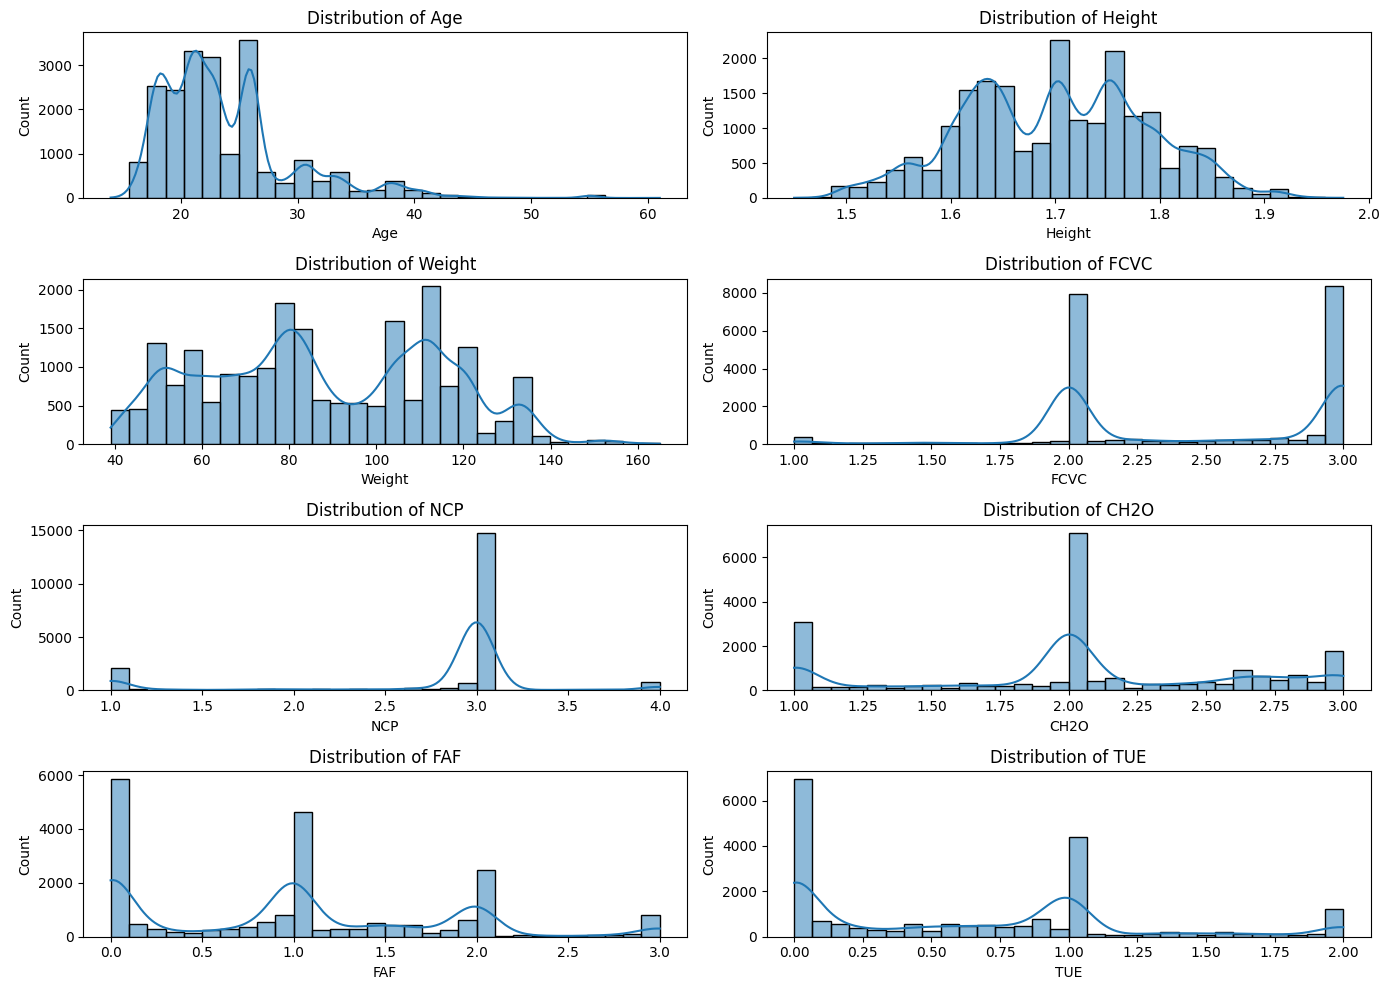


Univariate Analysis (Numeric Variables):
The histograms with KDE plots provide a detailed view of each numeric variable's
distribution. Age, weight, and TUE (time spent on physical activities) show
positive skewness, indicating higher concentrations of younger participants,
lower weights, and less time spent on physical activities. Height and CH2O
(water consumption) display relatively symmetric distributions, while FCVC
(frequency of vegetable consumption) and NCP (number of meals per day) show
specific peaks, indicating common consumption patterns.


In [3]:

#===============================================================================
# Univariate Analysis
#===============================================================================
# Define the numeric variables for the original dataset
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Univariate Analysis: Plot histograms for each original numeric variable
plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()


text="""
Univariate Analysis (Numeric Variables):
The histograms with KDE plots provide a detailed view of each numeric variable's
distribution. Age, weight, and TUE (time spent on physical activities) show
positive skewness, indicating higher concentrations of younger participants,
lower weights, and less time spent on physical activities. Height and CH2O
(water consumption) display relatively symmetric distributions, while FCVC
(frequency of vegetable consumption) and NCP (number of meals per day) show
specific peaks, indicating common consumption patterns."""
print(text)

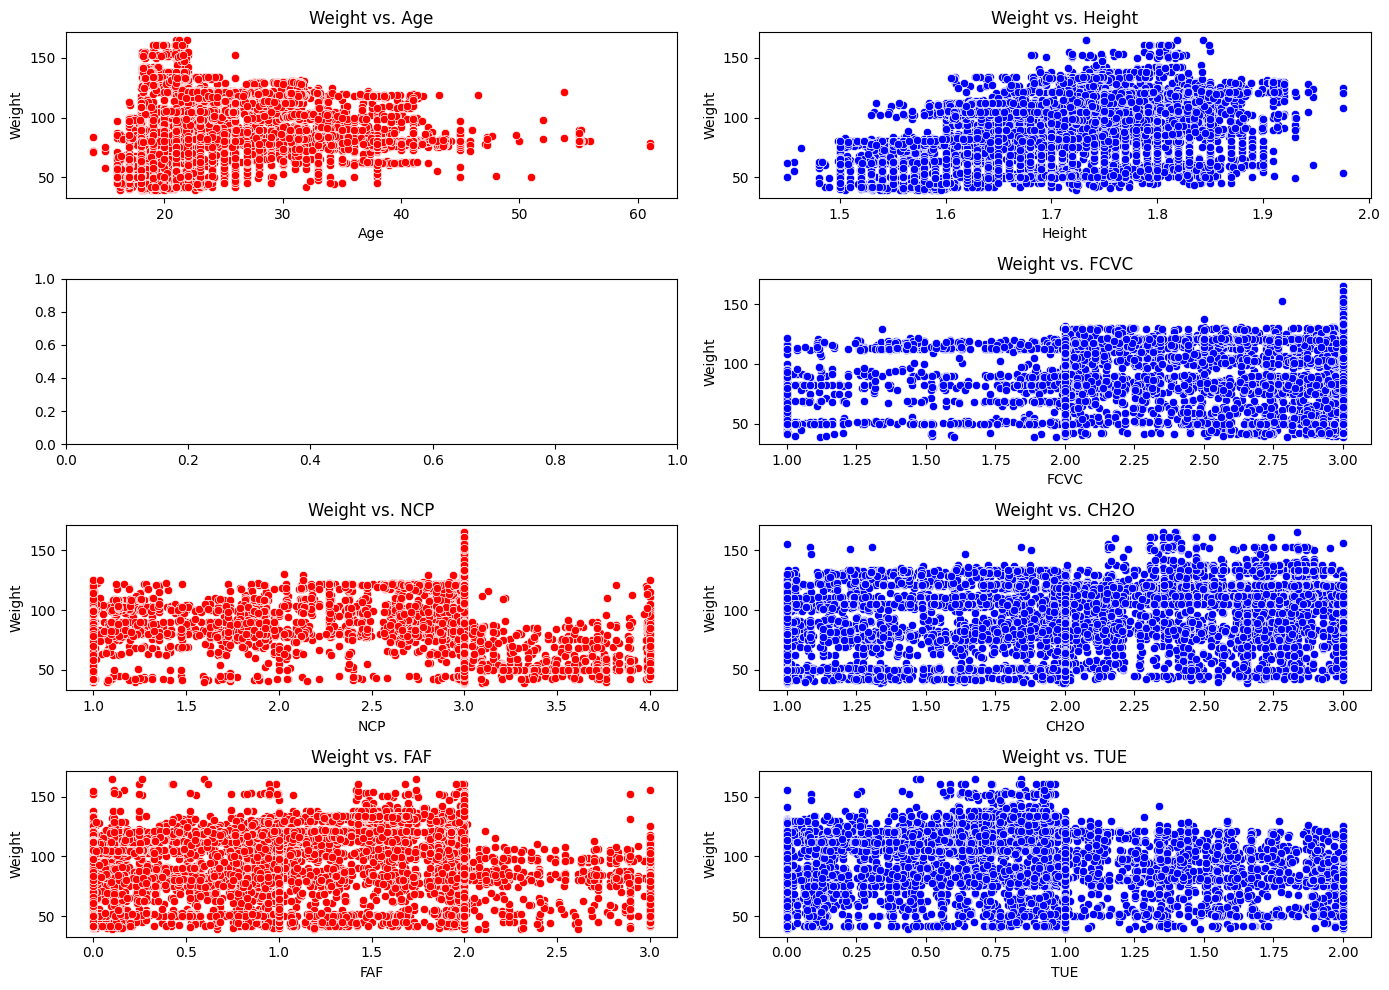


Bivariate Analysis (Weight vs. Other Variables):
The scatter plots reveal the relationships between weight and other numeric
variables. Weight shows a positive relationship with age and height, indicating
that older and taller participants generally weigh more. There is no significant
relationship between weight and variables like FCVC, CH2O, and FAF, suggesting
limited direct influence on weight.


In [4]:

#===============================================================================
# Bivariate Analysis
#===============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Define the colors
colors = ['blue', 'red']

# Plot scatter plots for Weight vs. other numeric variables
plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    if column != 'Weight':
        sns.scatterplot(x=column, y='Weight', data=data, color=colors[i % 2])
        plt.title(f"Weight vs. {column}")
plt.tight_layout()
plt.show()

text="""
Bivariate Analysis (Weight vs. Other Variables):
The scatter plots reveal the relationships between weight and other numeric
variables. Weight shows a positive relationship with age and height, indicating
that older and taller participants generally weigh more. There is no significant
relationship between weight and variables like FCVC, CH2O, and FAF, suggesting
limited direct influence on weight."""
print(text)


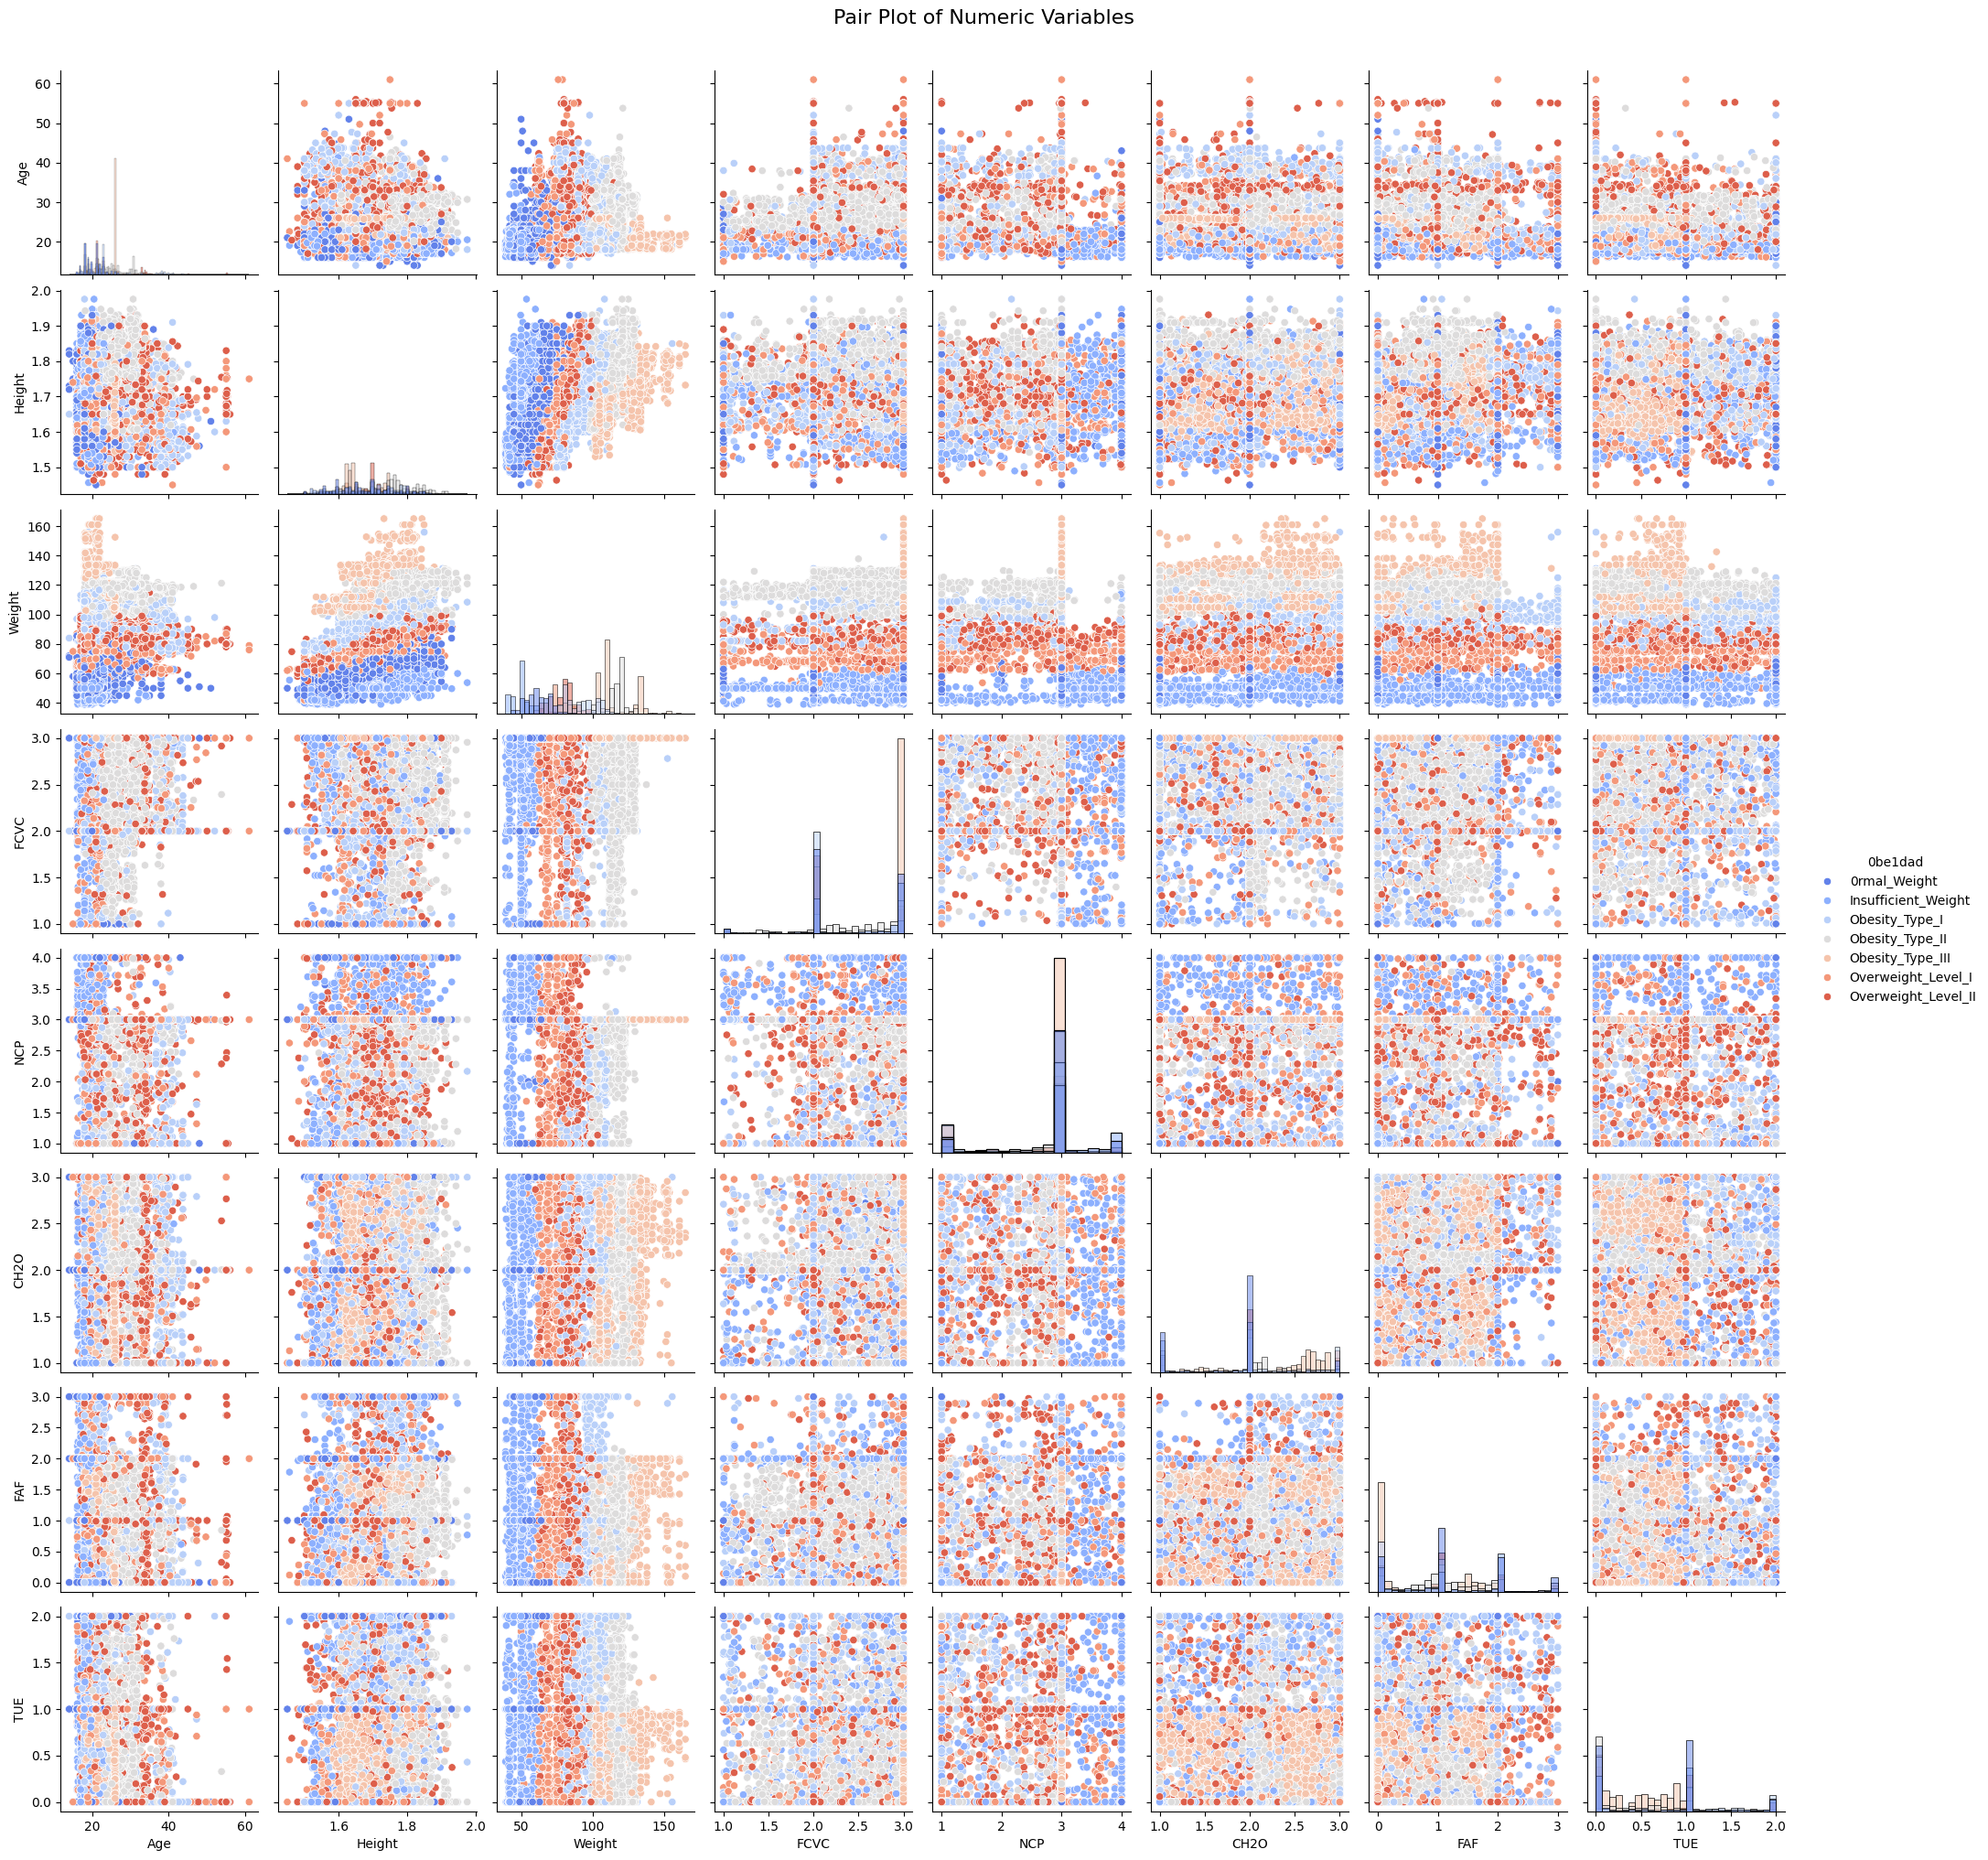


Multivariate Analysis (Pair Plot):
The pair plot shows the relationships between multiple numeric variables,
color-coded by weight category. Age and weight show distinct separation across
categories, with older participants tending to have higher obesity levels.
Height and weight also show separation, with taller individuals more likely to
have higher obesity levels. Variables like FCVC and CH2O show limited separation,
indicating similar consumption patterns across weight categories. Overall, the
pair plot highlights key relationships and separations between variables and
weight categories.


In [5]:
#===============================================================================
# Multiivariate Analysis
#===============================================================================
# =============================================================================
# Full Script for Pair Plot with Well-Placed Title
# =============================================================================


# -----------------------------------------------------------------------------
# Step 3: Plot the Pair Plot with a Well-Placed Title
# -----------------------------------------------------------------------------
# Combine the numeric columns with the target
plot_columns = numeric_columns + ['0be1dad']

# Create the pair plot
g = sns.pairplot(data[plot_columns], hue='0be1dad', palette='coolwarm', diag_kind='hist')

# Use suptitle to add a main title for the figure, adjusting its vertical position as needed
g.fig.suptitle("Pair Plot of Numeric Variables", fontsize=16, y=1.02)

plt.show()

text="""
Multivariate Analysis (Pair Plot):
The pair plot shows the relationships between multiple numeric variables,
color-coded by weight category. Age and weight show distinct separation across
categories, with older participants tending to have higher obesity levels.
Height and weight also show separation, with taller individuals more likely to
have higher obesity levels. Variables like FCVC and CH2O show limited separation,
indicating similar consumption patterns across weight categories. Overall, the
pair plot highlights key relationships and separations between variables and
weight categories."""
print(text)



Target Classes: ['0rmal_Weight' 'Insufficient_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']

All feature columns used for correlation analysis: ['Log_Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'Sqrt_FAF', 'Sqrt_TUE', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'Gender_Male', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CALC_Frequently', 'CALC_Sometimes', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']


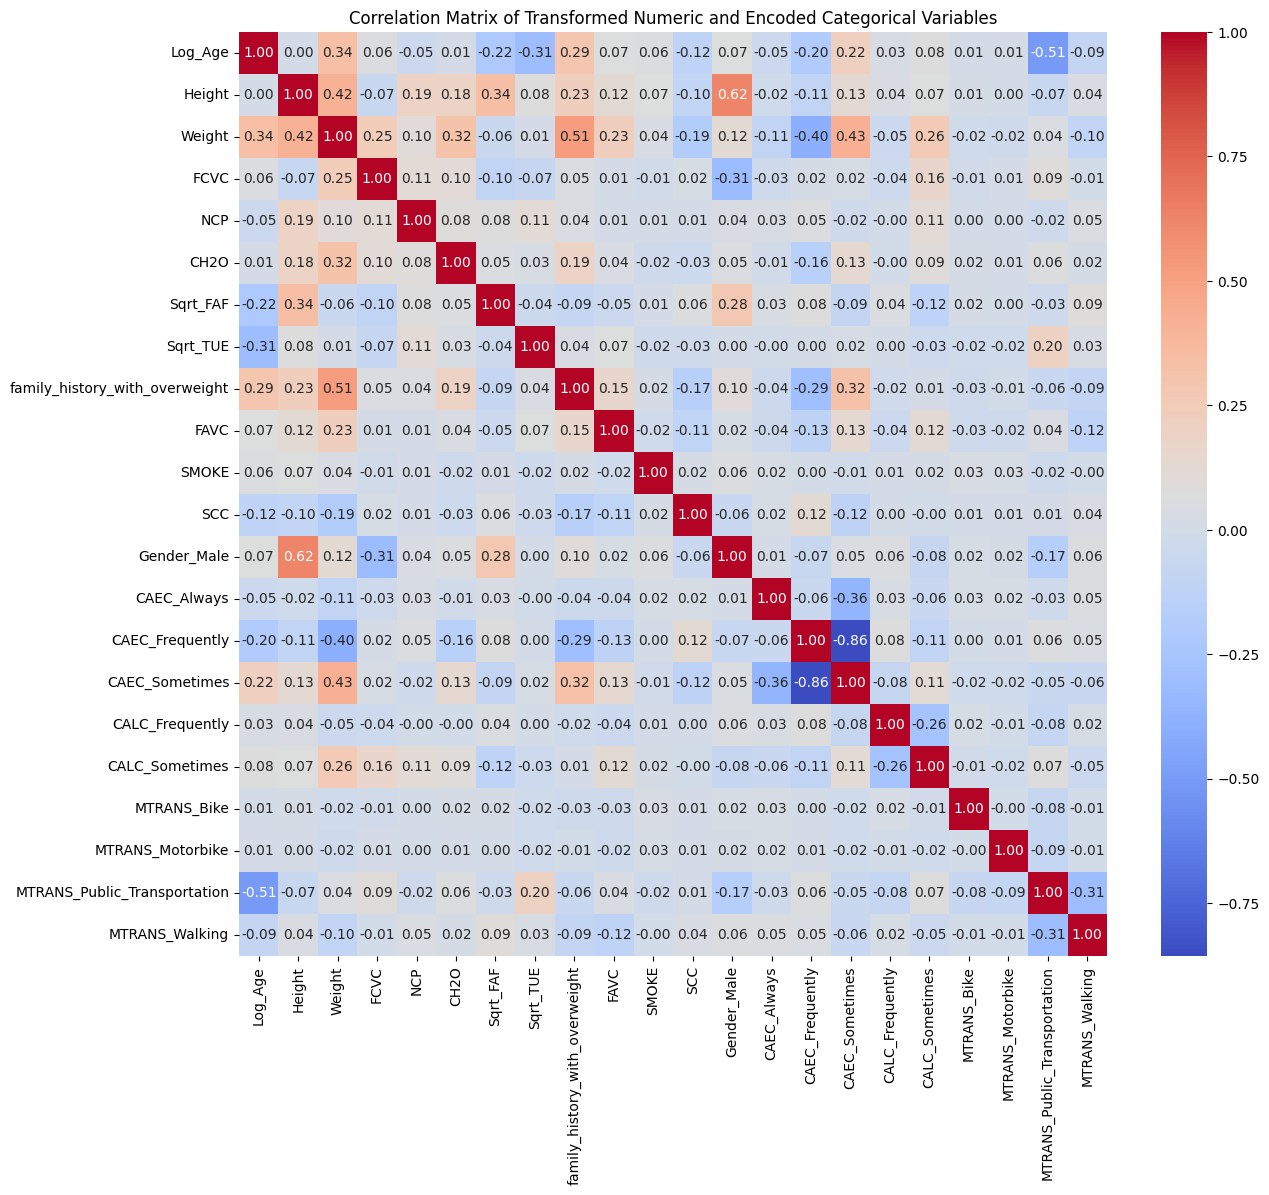


Correlation Matrix (Full):
                                  Log_Age    Height    Weight      FCVC  \
Log_Age                         1.000000  0.000445  0.336769  0.057070   
Height                          0.000445  1.000000  0.416677 -0.071546   
Weight                          0.336769  0.416677  1.000000  0.245682   
FCVC                            0.057070 -0.071546  0.245682  1.000000   
NCP                            -0.050059  0.191383  0.095947  0.113349   
CH2O                            0.007317  0.183706  0.317914  0.101299   
Sqrt_FAF                       -0.222413  0.340389 -0.056279 -0.103492   
Sqrt_TUE                       -0.308257  0.078211  0.008433 -0.074079   
family_history_with_overweight  0.290583  0.228137  0.514147  0.047756   
FAVC                            0.068109  0.115566  0.228770  0.006952   
SMOKE                           0.059379  0.069748  0.040416 -0.012191   
SCC                            -0.121435 -0.095923 -0.185116  0.022120   
Gender_Ma

In [6]:

# =============================================================================
# Step 3: Data Transformation Based on Descriptive Diagnostics
# =============================================================================
# Based on the descriptive stats, we decide to transform:
# - Age (positively skewed) using log transformation.
# - TUE and FAF (moderate skew) using square root transformation.
data['Log_Age'] = np.log1p(data['Age'])
data['Sqrt_TUE'] = np.sqrt(data['TUE'])
data['Sqrt_FAF'] = np.sqrt(data['FAF'])

# Define our new list of numeric columns using the transformed variables.
numeric_columns = ['Log_Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'Sqrt_FAF', 'Sqrt_TUE']

# =============================================================================
# Step 4: One-Hot Encode Categorical Variables and Prepare the Dataset
# =============================================================================
# Drop the 'id' and target column ('0be1dad') from X.
X = data.drop(['id', '0be1dad'], axis=1)
# Remove the original Age, TUE, and FAF; we'll use the transformed variables instead.
X = X.drop(['Age', 'TUE', 'FAF'], axis=1)

# One-hot encode categorical features: Gender, CAEC, CALC, MTRANS.
X = pd.get_dummies(X, columns=['Gender', 'CAEC', 'CALC', 'MTRANS'], drop_first=True)

# =============================================================================
# Step 5: Encode the Target Variable Separately
# =============================================================================
le = LabelEncoder()
y = le.fit_transform(data['0be1dad'])
print("\nTarget Classes:", le.classes_)

# =============================================================================
# Step 6: Correlation Analysis with Transformed and Encoded Variables
# =============================================================================
# Create a list of all feature columns to check correlations:
all_feature_columns = numeric_columns + list(X.columns.drop(numeric_columns))
print("\nAll feature columns used for correlation analysis:", all_feature_columns)

plt.figure(figsize=(14, 12))
corr_full = X[all_feature_columns].corr()
sns.heatmap(corr_full, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Transformed Numeric and Encoded Categorical Variables")
plt.show()

print("\nCorrelation Matrix (Full):\n", corr_full)

text="""The pair plot shows a strong, nearly linear positive correlation between
Height and Weight, indicating that taller individuals tend to weigh more. Age
exhibits a modest inverse relationship with FCVC, suggesting that dietary
patterns might shift slightly with age. Additionally, the positive trend between
CH2O and TUE implies that individuals with higher energy expenditure tend to
hydrate more, while FAF displays significant variability in physical activity
levels. When colored by obesity level ('0be1dad'), distinct clusters in the
Height–Weight and Age–Weight plots underscore these features’ importance in
differentiating obesity classes. Overall, these relationships confirm expected
trends and help identify key predictors for further analysis."""

print(text)


In [7]:

# =============================================================================
# Step 7: Data Preprocessing - Scaling of Numeric Variables
# =============================================================================
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# =============================================================================
# Step 8: Feature Selection Using LASSO (L1 Regularized Logistic Regression)
# =============================================================================
lasso_log_reg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)
lasso_log_reg.fit(X, y)

coefficients = lasso_log_reg.coef_[0]
selected_feature_mask = coefficients != 0
selected_features = X.columns[selected_feature_mask]
print("\nFeatures selected by Lasso (non-zero coefficients):")
print(selected_features)

X_selected = X[selected_features]

# =============================================================================
# Step 9: Split the Data into Training and Testing Sets
# =============================================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42, stratify=y
)

# =============================================================================
# Step 10: Define the Model Evaluation and Diagnostic Functions
# =============================================================================
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print(f"\n{model_name} Classification Report (Training Set):")
    print(classification_report(y_train, y_pred_train))
    print(f"\n{model_name} Classification Report (Test Set):")
    print(classification_report(y_test, y_pred_test))

    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
    axes[0, 0].set_title(f"{model_name} Confusion Matrix (Train)")
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
    axes[0, 1].set_title(f"{model_name} Confusion Matrix (Test)")

    # Residual plots
    residuals_train = y_train - y_pred_train
    residuals_test = y_test - y_pred_test
    sns.scatterplot(x=y_pred_train, y=residuals_train, ax=axes[1, 0])
    axes[1, 0].set_title(f"{model_name} Residual Plot (Train)")
    sns.scatterplot(x=y_pred_test, y=residuals_test, ax=axes[1, 1])
    axes[1, 1].set_title(f"{model_name} Residual Plot (Test)")

    plt.tight_layout()
    plt.show()

    # Q-Q Plots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sm.qqplot(residuals_train, line='45', ax=axes[0])
    axes[0].set_title(f"{model_name} Q–Q Plot (Train Residuals)")
    sm.qqplot(residuals_test, line='45', ax=axes[1])
    axes[1].set_title(f"{model_name} Q–Q Plot (Test Residuals)")
    plt.tight_layout()
    plt.show()

    return y_pred_train, y_pred_test

def plot_feature_importances(model, feature_names, model_name):
    try:
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            series = pd.Series(importances, index=feature_names)
            series.sort_values(ascending=True).plot(kind='barh', figsize=(8, 6))
            plt.title(f"Feature Importances for {model_name}")
            plt.xlabel("Importance")
            plt.show()
        elif hasattr(model, 'coef_'):
            coefs = model.coef_[0]
            series = pd.Series(coefs, index=feature_names)
            series.sort_values(ascending=True).plot(kind='barh', figsize=(8, 6))
            plt.title(f"Feature Coefficients for {model_name}")
            plt.xlabel("Coefficient Value")
            plt.show()
        else:
            print(f"{model_name} does not provide feature importances or coefficients.")
    except Exception as e:
        print(f"Error plotting feature importances for {model_name}: {e}")

def plot_bagging_feature_importances(bagging_model, feature_names, model_name):
    try:
        if hasattr(bagging_model, 'estimators_'):
            coefs = []
            for est in bagging_model.estimators_:
                if hasattr(est, 'coef_'):
                    coefs.append(est.coef_[0])
            if coefs:
                avg_coefs = np.mean(coefs, axis=0)
                series = pd.Series(avg_coefs, index=feature_names)
                series.sort_values(ascending=True).plot(kind='barh', figsize=(8, 6))
                plt.title(f"Aggregated Feature Coefficients for {model_name}")
                plt.xlabel("Average Coefficient Value")
                plt.show()
            else:
                print(f"No coefficients found in the base estimators for {model_name}.")
        else:
            print(f"{model_name} does not have an 'estimators_' attribute.")
    except Exception as e:
        print(f"Error plotting bagging feature importances for {model_name}: {e}")




Features selected by Lasso (non-zero coefficients):
Index(['Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'SMOKE', 'CH2O', 'SCC', 'Log_Age', 'Sqrt_TUE', 'Sqrt_FAF',
       'Gender_Male', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes',
       'CALC_Frequently', 'CALC_Sometimes', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')



Decision Tree with Depth Regularization Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.83      0.64      0.72      2157
           1       0.89      0.92      0.91      1766
           2       0.87      0.78      0.82      2037
           3       0.97      0.95      0.96      2274
           4       1.00      1.00      1.00      2832
           5       0.56      0.81      0.66      1699
           6       0.73      0.69      0.71      1765

    accuracy                           0.84     14530
   macro avg       0.83      0.83      0.83     14530
weighted avg       0.85      0.84      0.84     14530


Decision Tree with Depth Regularization Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.83      0.65      0.73       925
           1       0.89      0.92      0.90       757
           2       0.84      0.78      0.81       873
           3       0.96      0.9

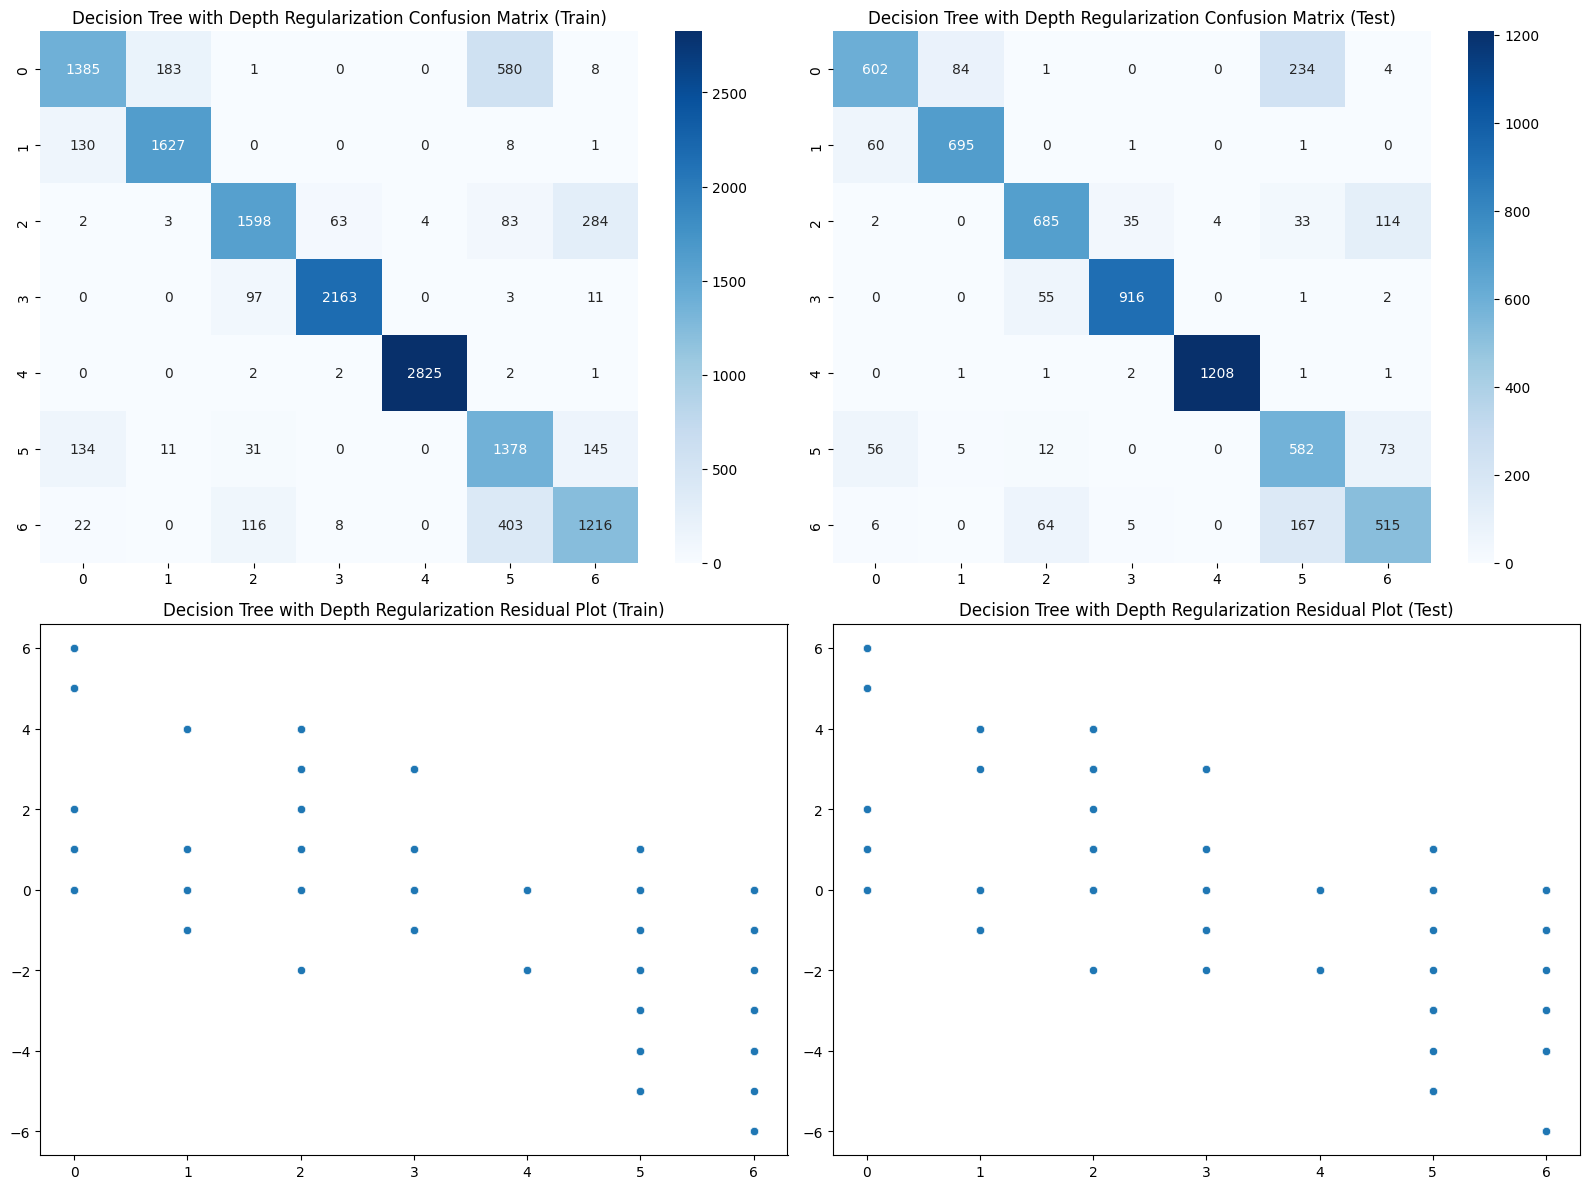

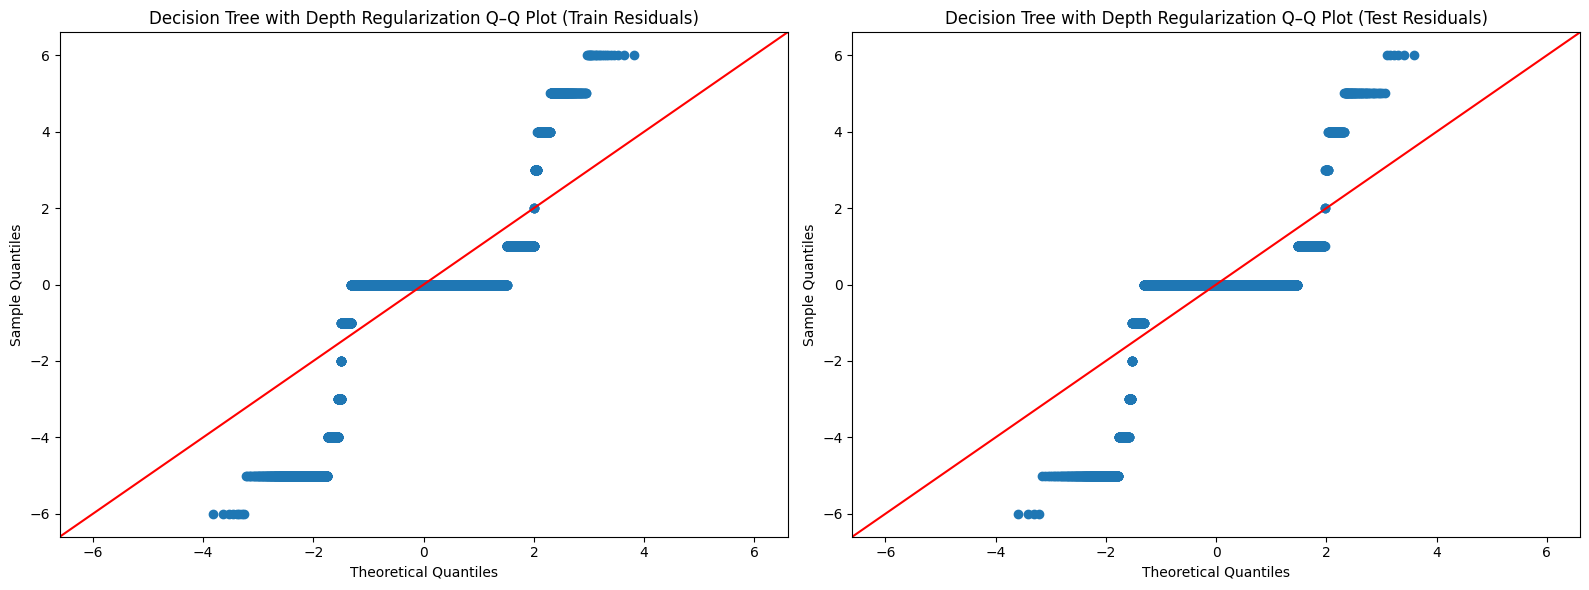

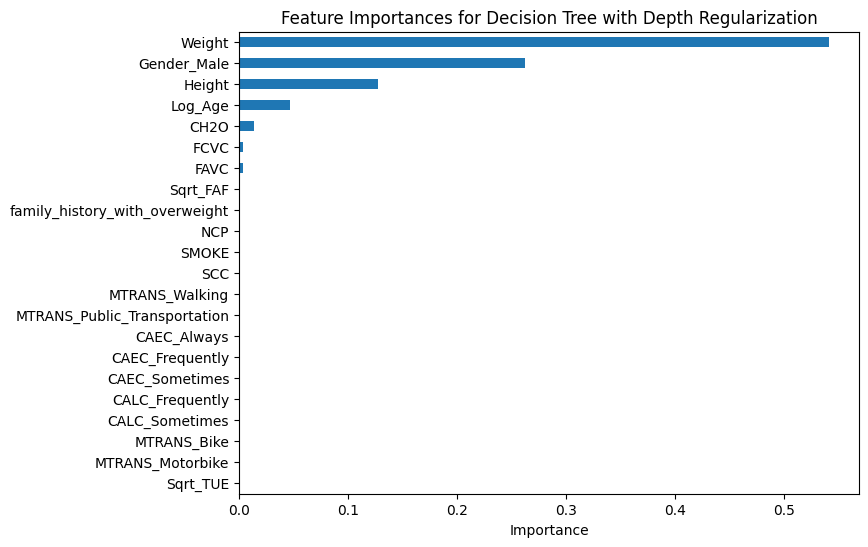

In [8]:
# =============================================================================
# Step 11: Train and Evaluate the Four Classification Models
# =============================================================================
# =============================================================================
# Decision Tree with Depth Regularization
# =============================================================================
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
evaluate_model(dt, X_train, y_train, X_test, y_test, "Decision Tree with Depth Regularization")
plot_feature_importances(dt, X_selected.columns, "Decision Tree with Depth Regularization")




Random Forest with Depth Regularization Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.64      0.88      0.74      2157
           1       0.89      0.88      0.88      1766
           2       0.73      0.83      0.78      2037
           3       0.92      0.98      0.95      2274
           4       0.99      1.00      0.99      2832
           5       0.87      0.32      0.47      1699
           6       0.69      0.62      0.65      1765

    accuracy                           0.81     14530
   macro avg       0.82      0.79      0.78     14530
weighted avg       0.83      0.81      0.80     14530


Random Forest with Depth Regularization Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.62      0.88      0.73       925
           1       0.89      0.87      0.88       757
           2       0.72      0.82      0.77       873
           3       0.93      0.9

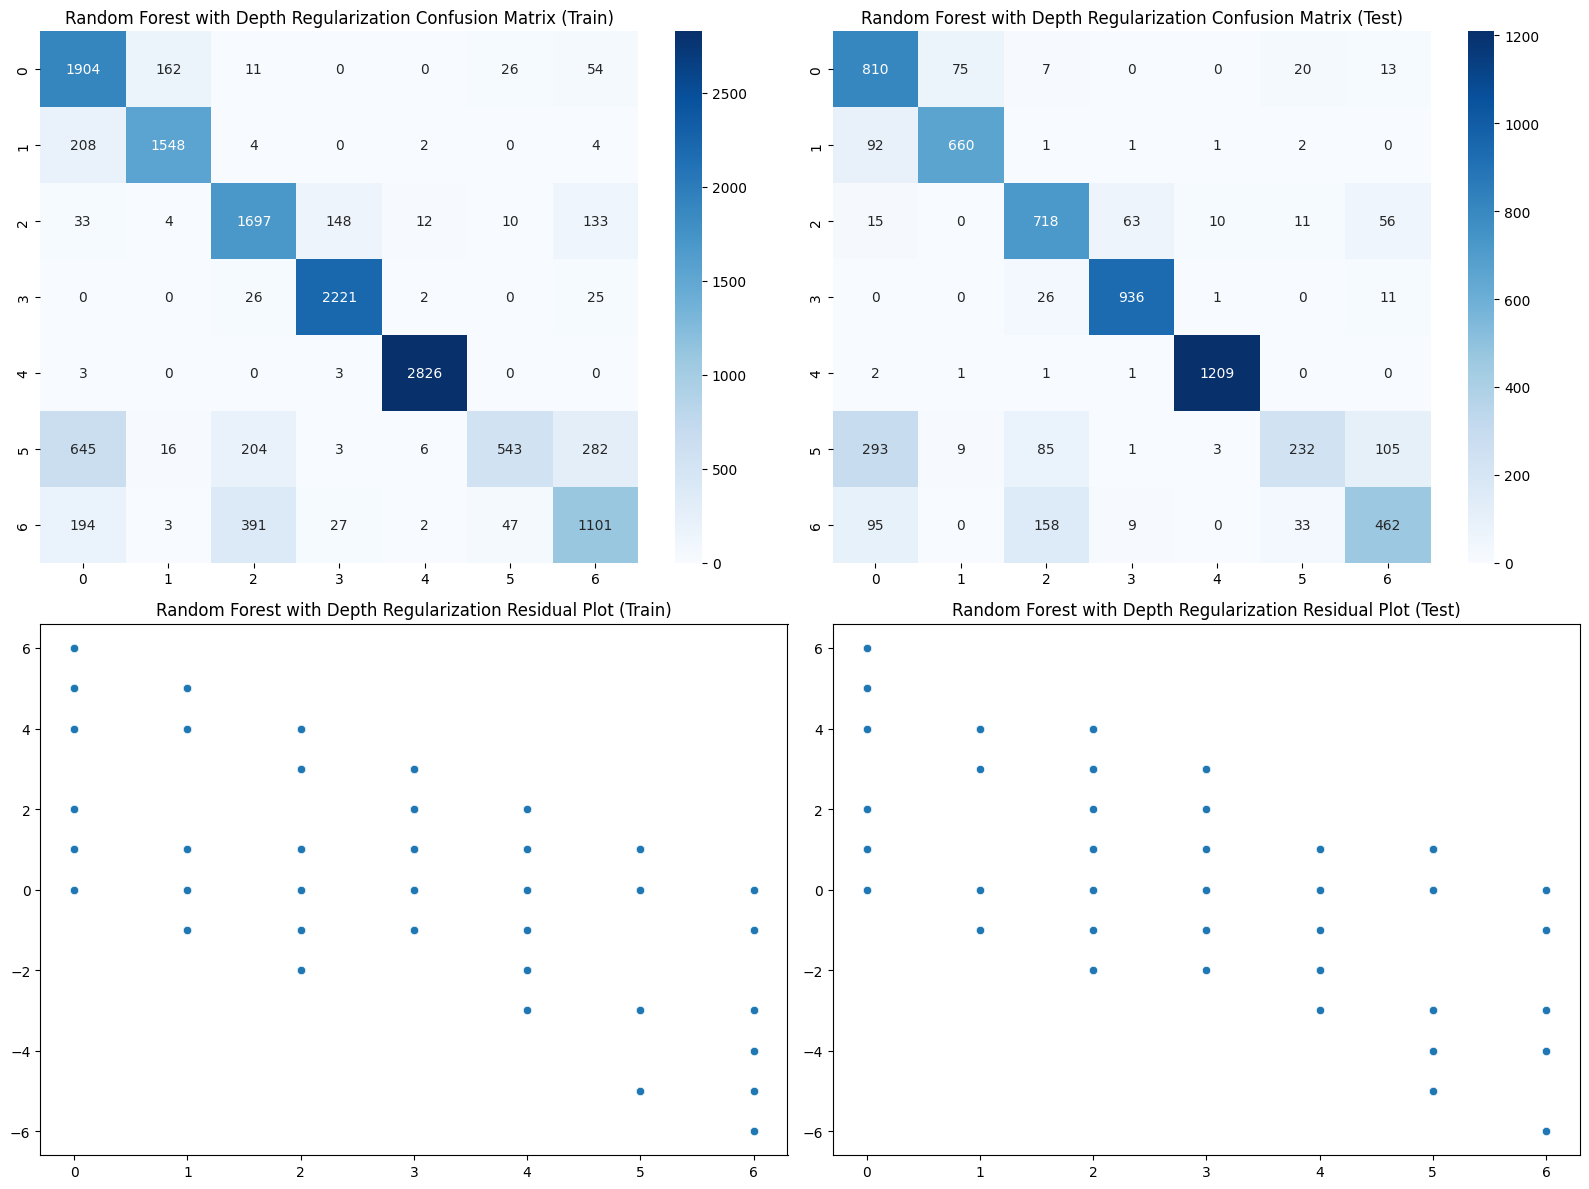

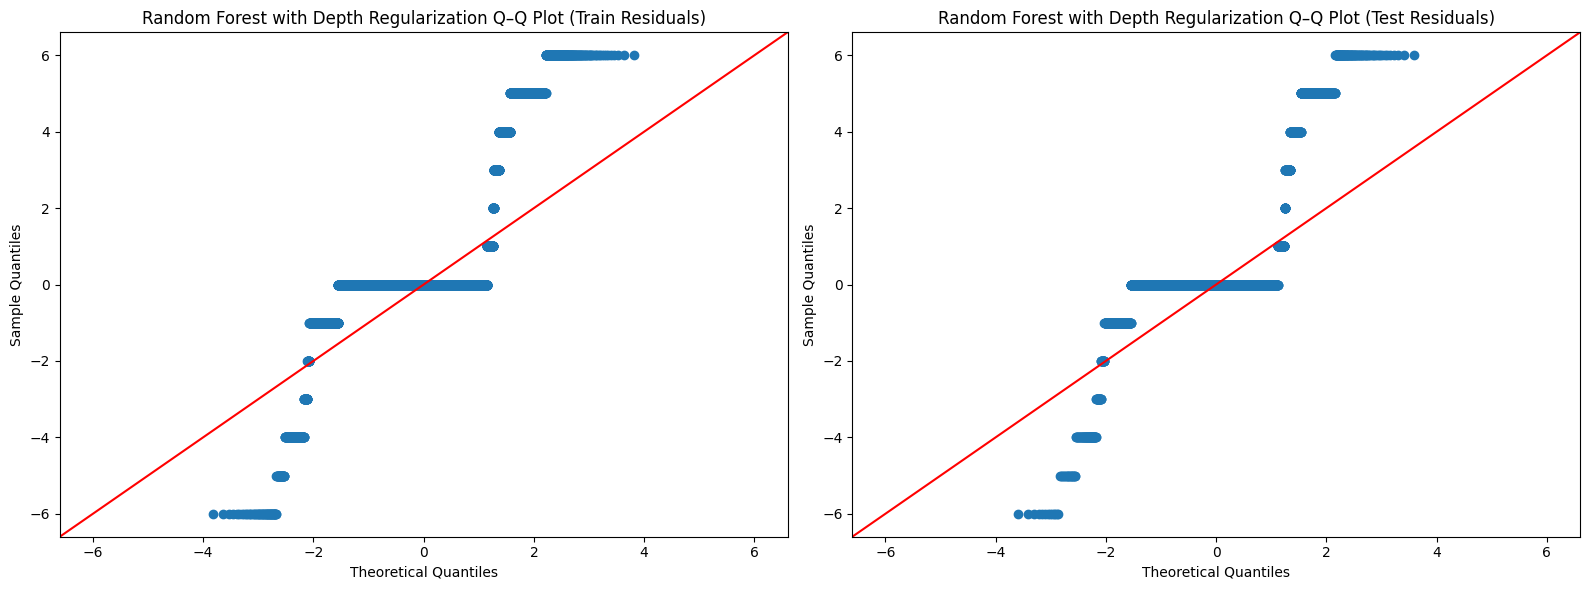

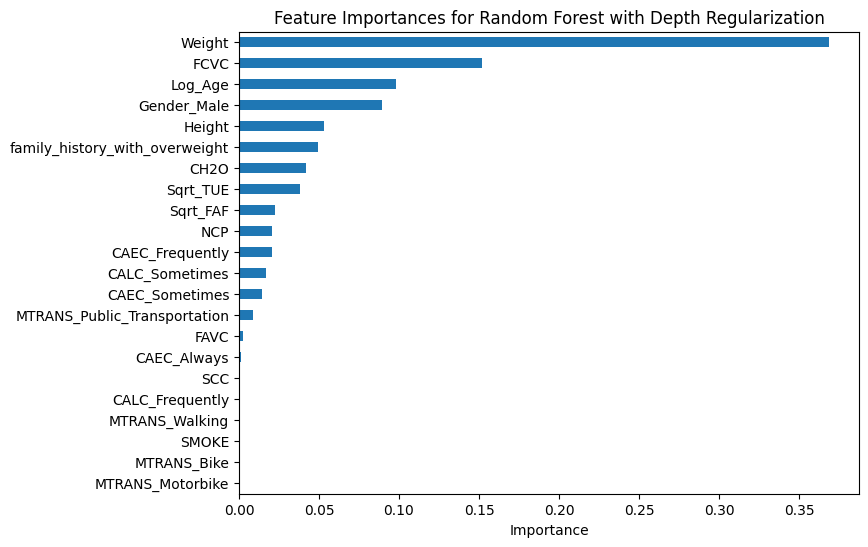

In [9]:
# =============================================================================
# Random Forest with Depth Regularization
# =============================================================================
rf = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)
evaluate_model(rf, X_train, y_train, X_test, y_test, "Random Forest with Depth Regularization")
plot_feature_importances(rf, X_selected.columns, "Random Forest with Depth Regularization")



Gradient Boosting with Depth Regularization Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2157
           1       0.94      0.95      0.95      1766
           2       0.92      0.92      0.92      2037
           3       0.98      0.98      0.98      2274
           4       1.00      1.00      1.00      2832
           5       0.85      0.79      0.82      1699
           6       0.84      0.86      0.85      1765

    accuracy                           0.92     14530
   macro avg       0.92      0.92      0.92     14530
weighted avg       0.92      0.92      0.92     14530


Gradient Boosting with Depth Regularization Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       925
           1       0.93      0.94      0.93       757
           2       0.88      0.88      0.88       873
           3       0.96 

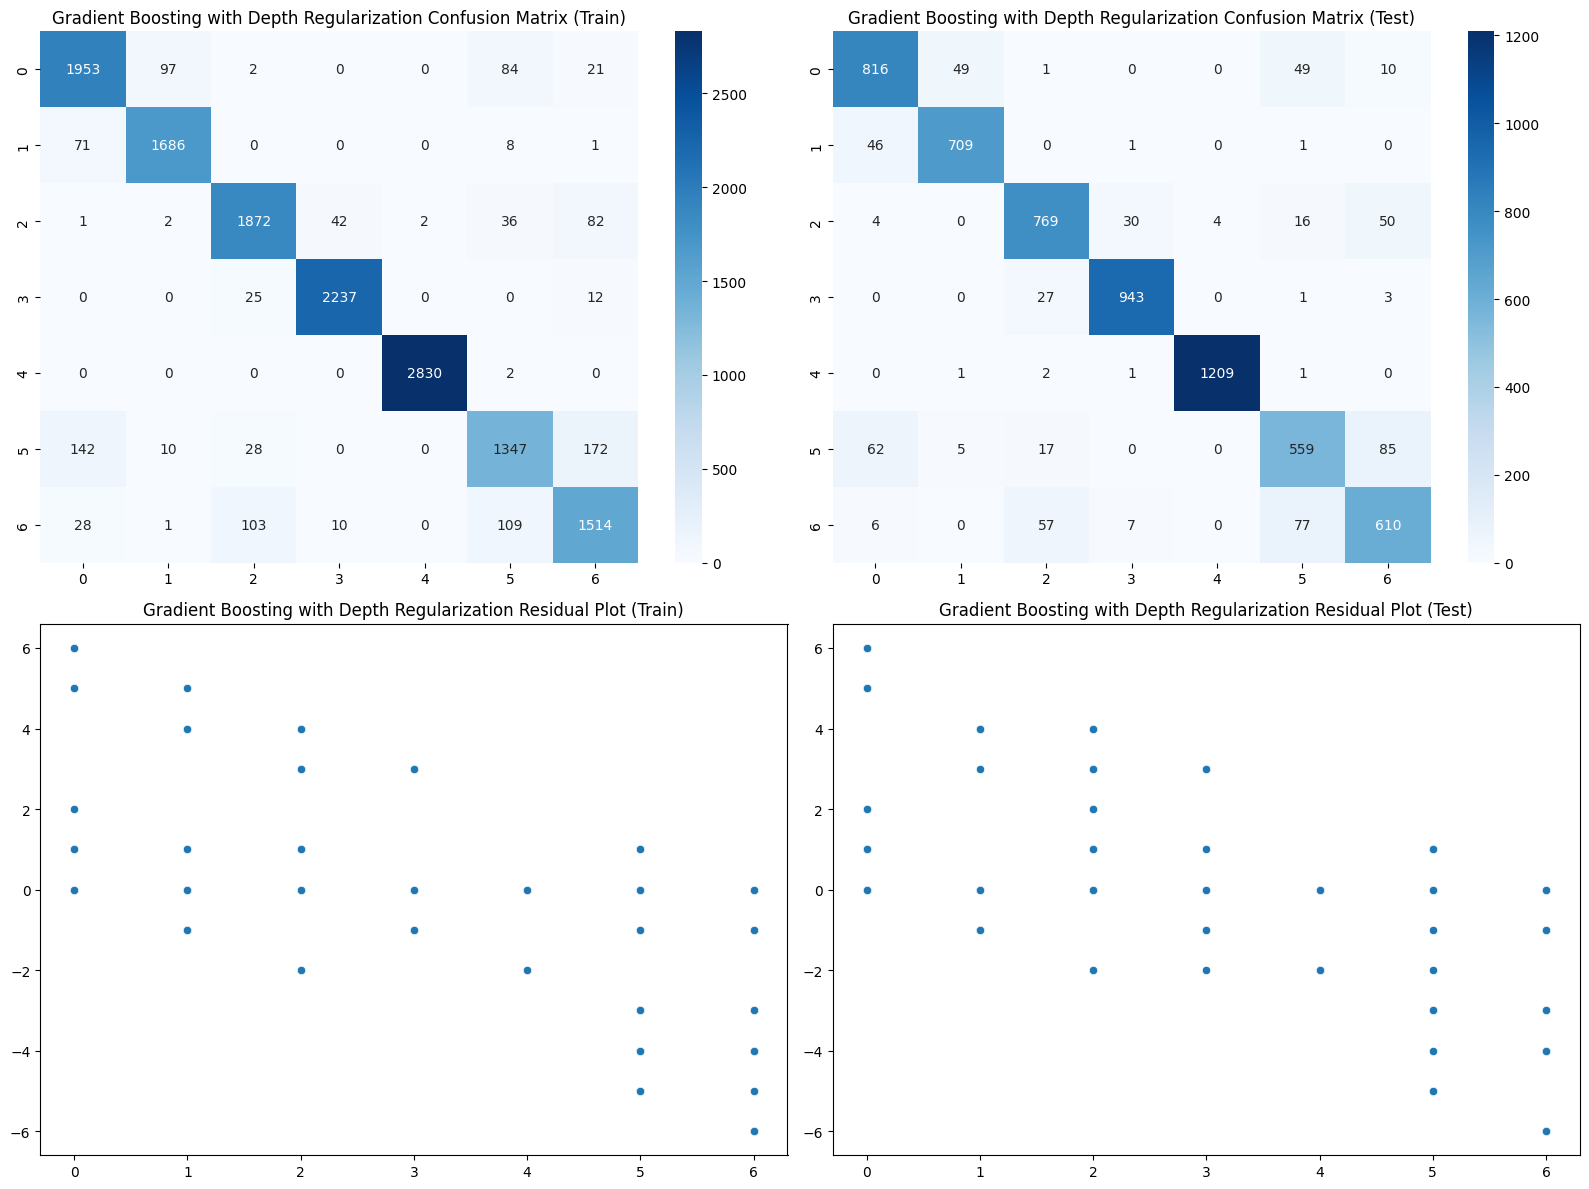

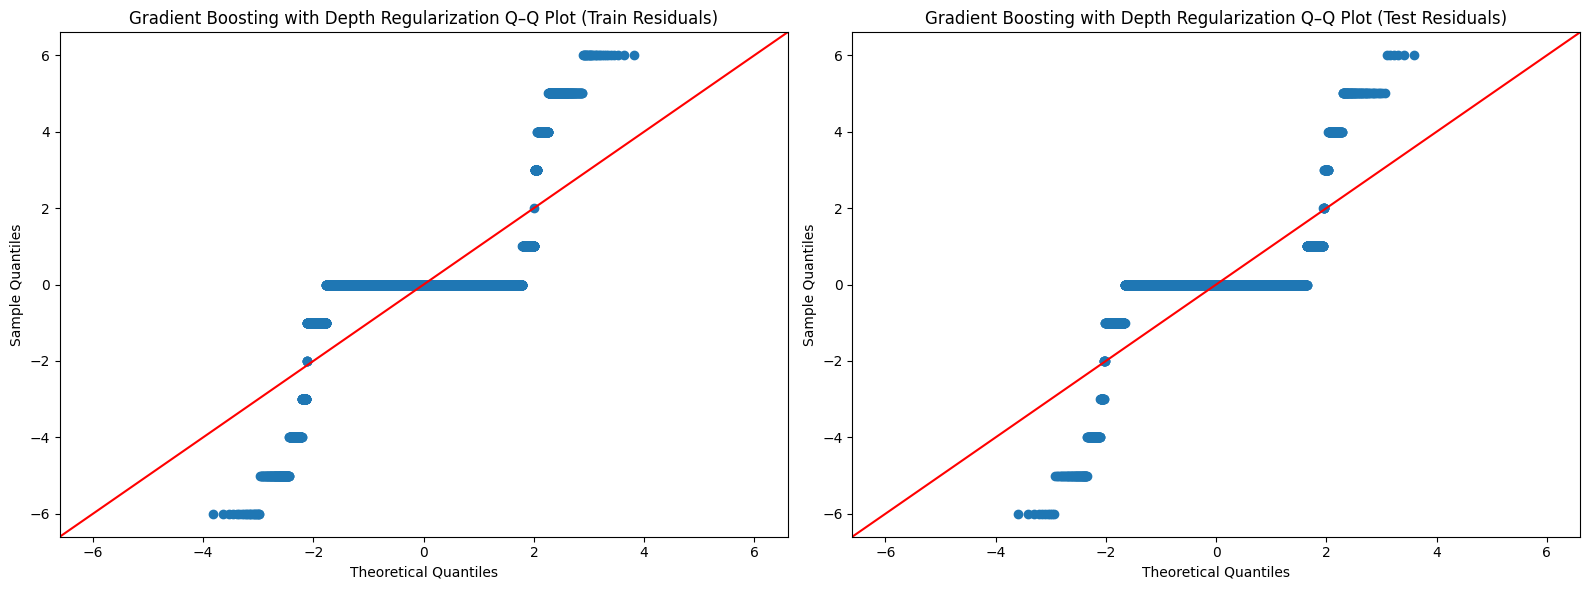

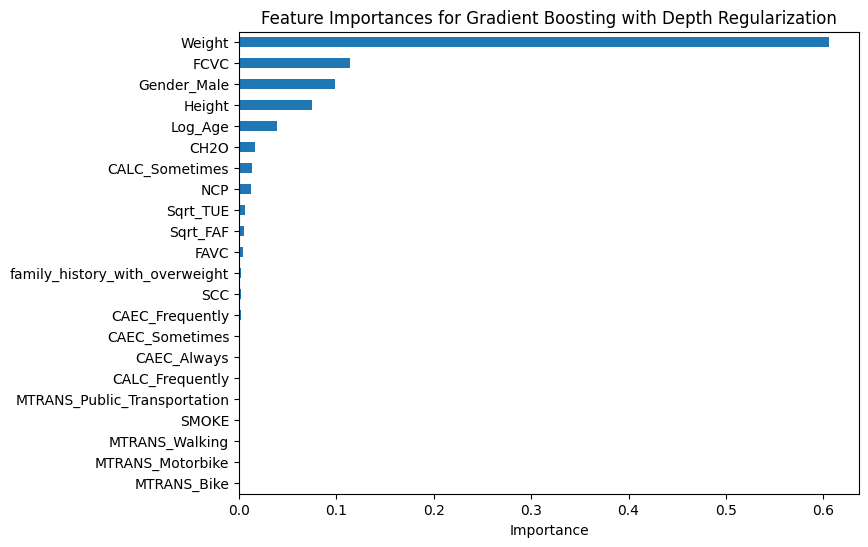

In [10]:
# =============================================================================
# Gradient Boosting with Depth Regularization
# =============================================================================
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
evaluate_model(gb, X_train, y_train, X_test, y_test, "Gradient Boosting with Depth Regularization")
plot_feature_importances(gb, X_selected.columns, "Gradient Boosting with Depth Regularization")



Bagging with Logistic Regression (L2) Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.66      0.65      0.66      2157
           1       0.86      0.93      0.89      1766
           2       0.66      0.70      0.68      2037
           3       0.88      0.97      0.92      2274
           4       0.99      1.00      0.99      2832
           5       0.58      0.46      0.51      1699
           6       0.55      0.51      0.53      1765

    accuracy                           0.77     14530
   macro avg       0.74      0.74      0.74     14530
weighted avg       0.76      0.77      0.76     14530


Bagging with Logistic Regression (L2) Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       925
           1       0.84      0.93      0.89       757
           2       0.65      0.69      0.67       873
           3       0.87      0.97   

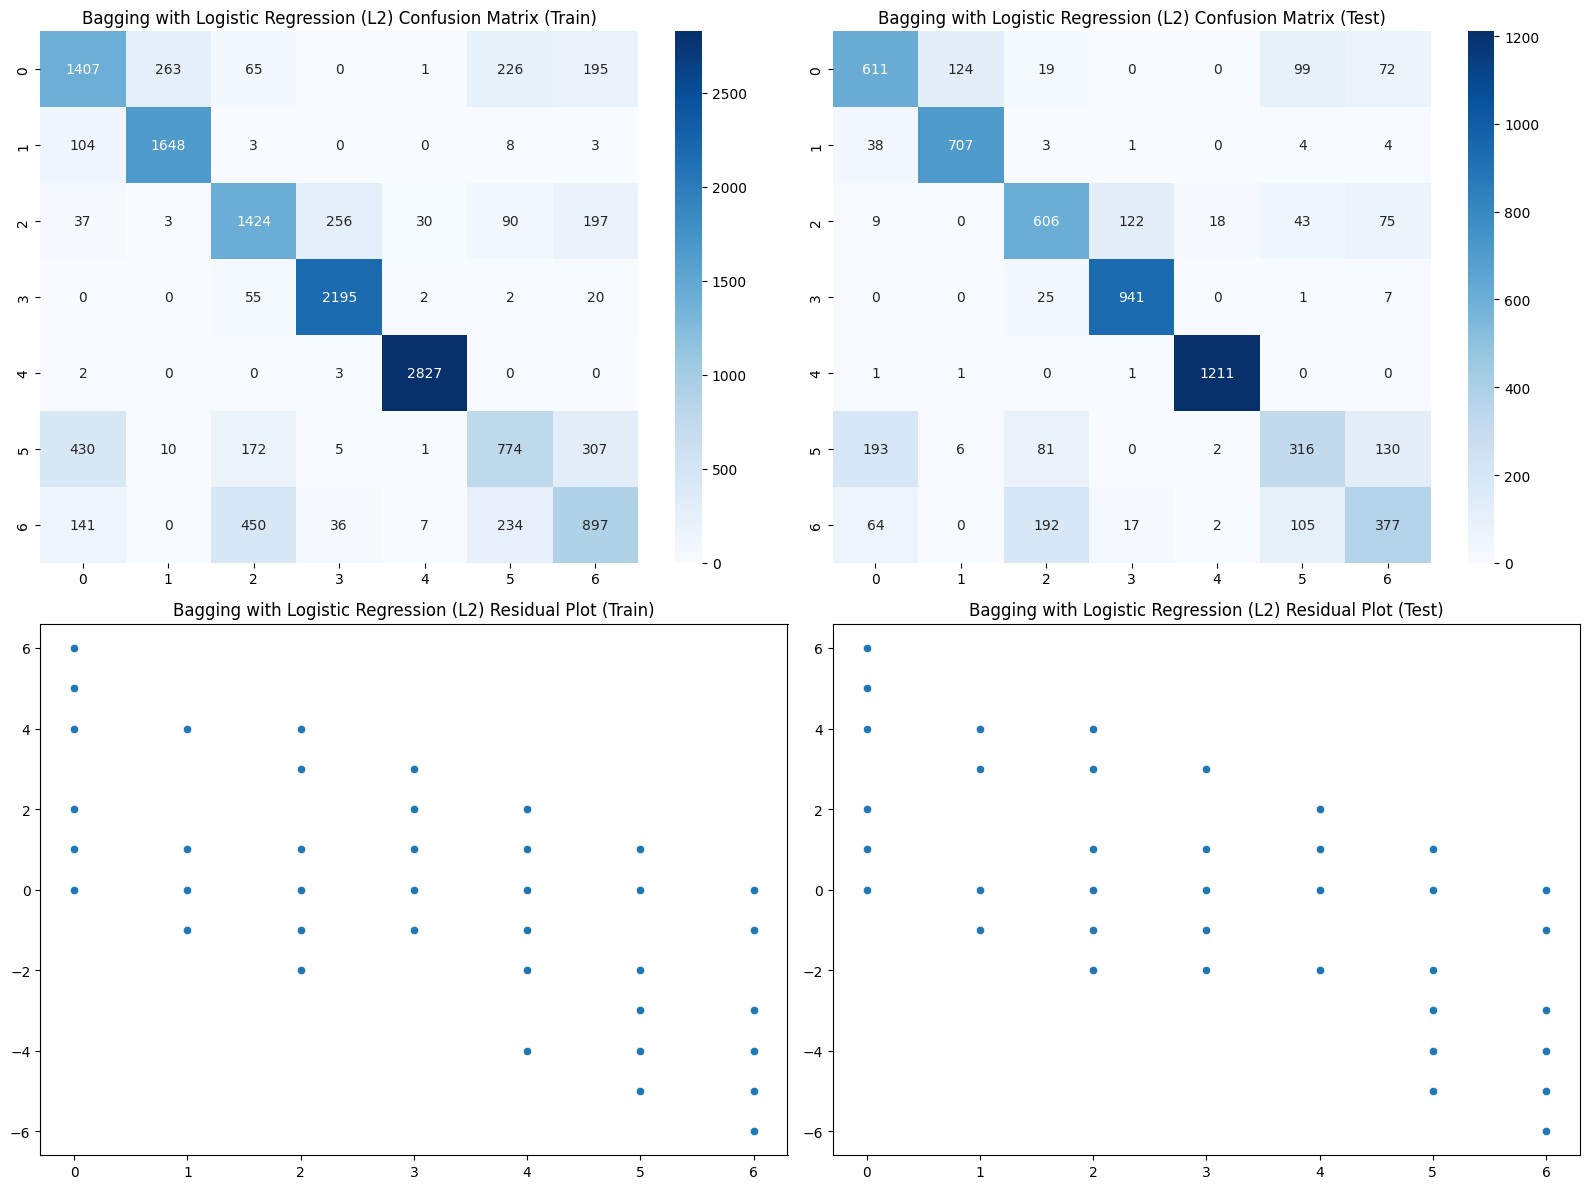

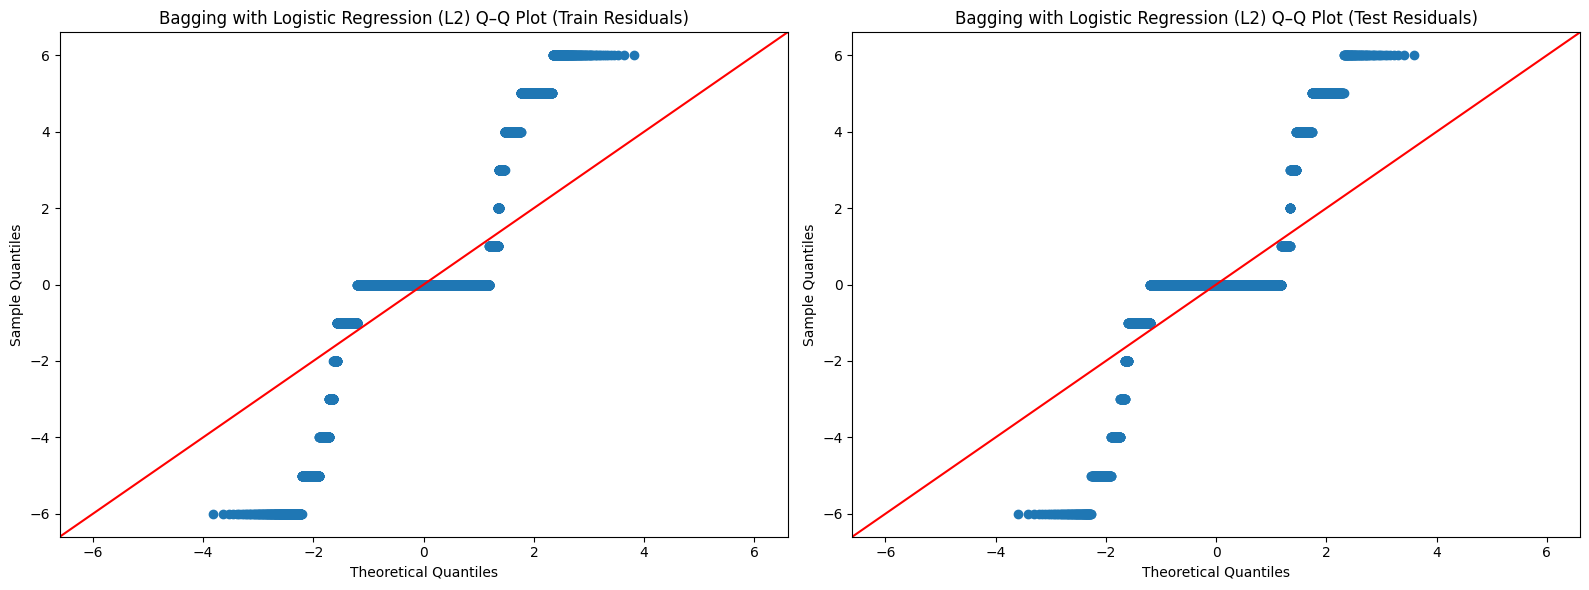

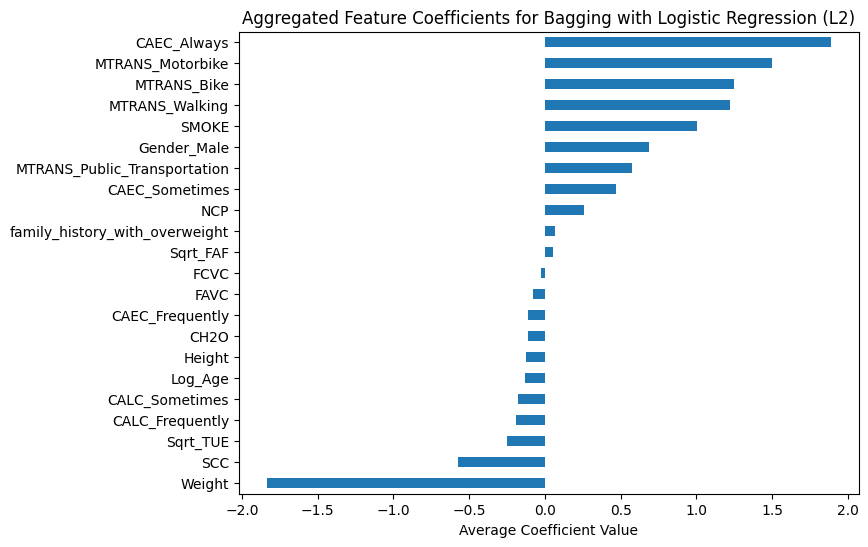

In [11]:
# =============================================================================
# Bagging with Logistic Regression (using L2 for diversity)
# =============================================================================
base_lr = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
bag = BaggingClassifier(estimator=base_lr, n_estimators=50, random_state=42)
evaluate_model(bag, X_train, y_train, X_test, y_test, "Bagging with Logistic Regression (L2)")
plot_bagging_feature_importances(bag, X_selected.columns, "Bagging with Logistic Regression (L2)")


In [12]:

# =============================================================================
# Step 12: Cross-Validation for Robustness Check
# =============================================================================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
models = {
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'Bagging': bag
}

for name, model in models.items():
    scores = cross_val_score(model, X_selected, y, cv=skf, scoring='accuracy')
    print(f"\nCross-Validation Results for {name}:")
    print(f"Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean():.4f}")
    print(f"Standard Deviation: {scores.std():.4f}")


Cross-Validation Results for Decision Tree:
Scores: [0.8473025  0.82731214 0.83839114 0.83377499 0.8299205 ]
Mean Accuracy: 0.8353
Standard Deviation: 0.0071

Cross-Validation Results for Random Forest:
Scores: [0.79600193 0.80563584 0.81936416 0.8007709  0.80293905]
Mean Accuracy: 0.8049
Standard Deviation: 0.0079

Cross-Validation Results for Gradient Boosting:
Scores: [0.90847784 0.89643545 0.91040462 0.89592869 0.89809684]
Mean Accuracy: 0.9019
Standard Deviation: 0.0063

Cross-Validation Results for Bagging:
Scores: [0.77095376 0.76517341 0.77480732 0.75403517 0.7677668 ]
Mean Accuracy: 0.7665
Standard Deviation: 0.0070


In [13]:
text="""For the Decision Tree, the cross‑validation results showed an average
accuracy of approximately 83.5% with a very low standard deviation of about 0.7%,
indicating that the model’s performance is stable across different subsets of
the data. The Q‑Q plots for this model, though not expected to match a perfect
normal distribution due to the discrete nature of classification residuals,
provided a useful visual confirmation that errors are distributed consistently
without any severe departures in particular quantiles. This combination of
cross‑validation metrics and residual diagnostic plots suggests that the Decision
Tree captures a substantial amount of the signal, albeit with the limitation
that its simple splitting structure might not fully model more nuanced
relationships in the data.

The Random Forest, evaluated through cross‑validation, achieved a lower mean
accuracy of around 80.5% with a similar level of consistency as shown by its
standard deviation of 0.8%. The Q‑Q plots for the ensemble of trees reveal a
characteristic clustering at zero, reflecting many correct classifications
balanced by discrete misclassifications along the tails. Despite its ensemble
nature meant to reduce variance through averaging, the Random Forest’s diagnostic
plots and stability metrics indicate that, under the current configuration, it
tends to replicate a similar error pattern across its many trees, leading to an
overall performance that trails the Decision Tree, perhaps suggesting an
opportunity for further hyperparameter tuning or feature engineering.

In contrast, the Gradient Boosting model stands out with a high mean accuracy of
about 90.2% according to cross‑validation, and its low standard deviation of
approximately 0.63% reinforces its consistent performance. The Q‑Q plots for
Gradient Boosting, although they also show the expected discrete clustering of
residuals, elucidate how each weak learner in the ensemble contributes to a more
balanced aggregate error distribution. The visually smoother clustering relative
to the simpler models underscores Gradient Boosting’s strength in iteratively
reducing errors and capturing complex, nonlinear relationships, which is
reflected in its superior classification metrics across all folds.

Finally, the Bagging classifier, which leverages Logistic Regression with L2
regularization as its base learner, recorded the lowest cross‑validated accuracy
of about 76.7% with a slightly higher variability (standard deviation around 0.7%).
The Q‑Q plots for the Bagging model reveal the characteristic discrete jumps
inherent in averaging predictions from multiple linear models, with a heavy
concentration at zero and noticeable deviations in the misclassified cases.
These diagnostic indicators imply that while the Bagging ensemble exhibits
stable performance, its base learners might be too simplistic to capture the
intrinsic complexity of the underlying data, especially for the more challenging
classes, yielding an overall predictive performance that is less
competitive than the tree-based methods. """
print(text)

For the Decision Tree, the cross‑validation results showed an average
accuracy of approximately 83.5% with a very low standard deviation of about 0.7%,
indicating that the model’s performance is stable across different subsets of
the data. The Q‑Q plots for this model, though not expected to match a perfect
normal distribution due to the discrete nature of classification residuals,
provided a useful visual confirmation that errors are distributed consistently
without any severe departures in particular quantiles. This combination of
cross‑validation metrics and residual diagnostic plots suggests that the Decision
Tree captures a substantial amount of the signal, albeit with the limitation
that its simple splitting structure might not fully model more nuanced
relationships in the data.

The Random Forest, evaluated through cross‑validation, achieved a lower mean
accuracy of around 80.5% with a similar level of consistency as shown by its
standard deviation of 0.8%. The Q‑Q plots for the

In [14]:
# =============================================================================
# Create Submission DataFrames for Each Model
# =============================================================================

# Decision Tree Submission
submission_train_tree = pd.DataFrame({
    'Id': pd.RangeIndex(start=0, stop=len(X_train), step=1),
    'Model': 'Decision Tree',
    'Predicted': dt.predict(X_train)
})
submission_test_tree = pd.DataFrame({
    'Id': pd.RangeIndex(start=0, stop=len(X_test), step=1),
    'Model': 'Decision Tree',
    'Predicted': dt.predict(X_test)
})

# Random Forest Submission
submission_train_forest = pd.DataFrame({
    'Id': pd.RangeIndex(start=0, stop=len(X_train), step=1),
    'Model': 'Random Forest',
    'Predicted': rf.predict(X_train)
})
submission_test_forest = pd.DataFrame({
    'Id': pd.RangeIndex(start=0, stop=len(X_test), step=1),
    'Model': 'Random Forest',
    'Predicted': rf.predict(X_test)
})

# Gradient Boosting Submission
submission_train_boosting = pd.DataFrame({
    'Id': pd.RangeIndex(start=0, stop=len(X_train), step=1),
    'Model': 'Gradient Boosting',
    'Predicted': gb.predict(X_train)
})
submission_test_boosting = pd.DataFrame({
    'Id': pd.RangeIndex(start=0, stop=len(X_test), step=1),
    'Model': 'Gradient Boosting',
    'Predicted': gb.predict(X_test)
})

# Bagging Submission
submission_train_bagging = pd.DataFrame({
    'Id': pd.RangeIndex(start=0, stop=len(X_train), step=1),
    'Model': 'Bagging',
    'Predicted': bag.predict(X_train)
})
submission_test_bagging = pd.DataFrame({
    'Id': pd.RangeIndex(start=0, stop=len(X_test), step=1),
    'Model': 'Bagging',
    'Predicted': bag.predict(X_test)
})

# =============================================================================
# Save Each Submission DataFrame as a CSV File
# =============================================================================
submission_train_tree.to_csv('submission_train_tree.csv', index=False)
submission_test_tree.to_csv('submission_test_tree.csv', index=False)

submission_train_forest.to_csv('submission_train_forest.csv', index=False)
submission_test_forest.to_csv('submission_test_forest.csv', index=False)

submission_train_boosting.to_csv('submission_train_boosting.csv', index=False)
submission_test_boosting.to_csv('submission_test_boosting.csv', index=False)

submission_train_bagging.to_csv('submission_train_bagging.csv', index=False)
submission_test_bagging.to_csv('submission_test_bagging.csv', index=False)

# =============================================================================
# Optionally, Display a Sample Submission for Verification
# =============================================================================
print("\nSample Submission for Decision Tree (Training Set):")
print(submission_train_tree.head())



Sample Submission for Decision Tree (Training Set):
   Id          Model  Predicted
0   0  Decision Tree          2
1   1  Decision Tree          5
2   2  Decision Tree          5
3   3  Decision Tree          4
4   4  Decision Tree          2
